In [83]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.decomposition import DictionaryLearning as dictLearn
from sklearn.metrics import pairwise_distances

from skimage.feature import local_binary_pattern
from skimage.feature import hog

In [39]:
####Data Loading
data = loadmat('YaleB_32x32')
features = data['fea']
labels = data['gnd']
print(len(features), len(labels))
X = features
y = labels

2414 2414


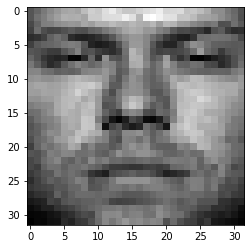

In [40]:
t= features[1].transpose()
img = t.reshape(32,32).astype(np.uint8).transpose()

plt.imshow(img, cmap='gray')
plt.show()

In [41]:
####Data and Features
def data_select(features,labels,n):
    X_tr,X_te,Y_tr,Y_te = [],[],[],[]
    
    for num in tqdm(range(1,39)):
        idx = np.where(labels == num)
        idx = idx[0]
        X = features[idx]
        y = labels[idx]
        x_tr, x_te, y_tr, y_te = \
                train_test_split(X,y, train_size=n, random_state=42)
        X_tr.append(x_tr)
        X_te.append(x_te)
        Y_tr.append(y_tr)
        Y_te.append(y_te)
        
    X_train,X_test,y_train,y_test = [],[],[],[]
    
    for i in X_tr:
        for j in range(0,len(i)):
            t = i[j].tolist()
            X_train.append(t)
    for i in X_te:
        for j in range(0,len(i)):
            t = i[j].tolist()
            X_test.append(t)
    #print(len(X_train),len(X_test))
    for i in Y_tr:
        for j in range(0,len(i)):
            t = i[j].tolist()
            y_train.append(t)
    for i in Y_te:
        for j in range(0,len(i)):
            t = i[j].tolist()
            y_test.append(t)
    #print(len(y_train),len(y_test))
    return X_train,X_test,y_train,y_test

def hog_extract(features,labels,n):
    hog_features = []
    for i in features:
        img = i.reshape(32,32).transpose()
        hogf = hog(img)
        hog_f = hogf.flatten()
        hog_features.append(hogf)
    
    X_tr,X_te,Y_tr,Y_te = [],[],[],[]
    
    for num in tqdm(range(1,39)):
        idx = np.where(labels == num)
        idx = idx[0]
        X,y=[],[]
        for it in idx:
            X.append(hog_features[it])
        y = labels[idx]
        x_tr, x_te, y_tr, y_te = \
                train_test_split(X,y, train_size=n, random_state=42)
        X_tr.append(x_tr)
        X_te.append(x_te)
        Y_tr.append(y_tr)
        Y_te.append(y_te)

    X_train,X_test,y_train,y_test = [],[],[],[]

    for i in X_tr:
        for j in range(0,len(i)):
            t = i[j].tolist()
            X_train.append(t)
    for i in X_te:
        for j in range(0,len(i)):
            t = i[j].tolist()
            X_test.append(t)
    #print(len(X_train),len(X_test))
    for i in Y_tr:
        for j in range(0,len(i)):
            t = i[j].tolist()
            y_train.append(t)
    for i in Y_te:
        for j in range(0,len(i)):
            t = i[j].tolist()
            y_test.append(t)
            
    return X_train,X_test,y_train,y_test
    
def lbp_extract(features,labels,n):
    radius = 3
    n_points = 8 * radius

    lbp_features = []
    for i in features:
        img = i.reshape(32,32).transpose()
        lbp = local_binary_pattern(img, n_points,radius)
        lbp = lbp.flatten()
        lbp_features.append(lbp)
    
    X_tr,X_te,Y_tr,Y_te = [],[],[],[]
    
    for num in tqdm(range(1,39)):
        idx = np.where(labels == num)
        idx = idx[0]
        X,y=[],[]
        for it in idx:
            X.append(lbp_features[it])
        y = labels[idx]
        x_tr, x_te, y_tr, y_te = \
                train_test_split(X,y, train_size=n, random_state=42)
        X_tr.append(x_tr)
        X_te.append(x_te)
        Y_tr.append(y_tr)
        Y_te.append(y_te)

        X_train,X_test,y_train,y_test = [],[],[],[]

    for i in X_tr:
        for j in range(0,len(i)):
            t = i[j].tolist()
            X_train.append(t)
    for i in X_te:
        for j in range(0,len(i)):
            t = i[j].tolist()
            X_test.append(t)
    #print(len(X_train),len(X_test))
    for i in Y_tr:
        for j in range(0,len(i)):
            t = i[j].tolist()
            y_train.append(t)
    for i in Y_te:
        for j in range(0,len(i)):
            t = i[j].tolist()
            y_test.append(t)
    return X_train,X_test,y_train,y_test
        

In [84]:
####Classifiers
def svm_FR(X_train,y_train,X_test,y_test):
    params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
    clf = GridSearchCV(svm.SVC(), params_grid, cv=5)
    clf.fit(X_train,y_train)
    err = clf.score(X_test,y_test)
    error = 100*(1-err)
    return error

def PCA_FR(X_train,X_test):
    pca = PCA(0.95)
    pca.fit(X_train)
    pca_X_train = pca.transform(X_train)
    pca_X_test = pca.transform(X_test)
    return pca_X_train, pca_X_test

def LD_FR(X_train,X_test):
    pca = PCA(0.95)
    pca.fit(X_train)
    pca_X_train = pca.transform(X_train)
    pca_X_test = pca.transform(X_test)
    lda = LDA()
    lda_X_train = lda.fit_transform(pca_X_train, y_train)
    lda_X_test = lda.transform(pca_X_test)
    return lda_X_train, lda_X_test

def SRC_FR(X_train,y_train,X_test,y_test):
    clf = dictLearn(transform_algorithm = 'lasso_lars')
    train_sparse = clf.fit_transform(X_train)
    test_sparse = clf.transform(X_test)
    pred = pairwise_distances(t,test_sparse,metric='euclidean')
    list_index = []
    for i in range(0,pred.shape[1]):
        idx = np.where(pred[:,i] == pred[:,i].min())
        list_index.append(idx)
    pred_clss = []
    for i in range(0,len(list_index)):
        cl  = list_index[i][0][0]
        pred_clss.append(y_train[cl])
    err = np.count_nonzero(np.array(pred_clss) - np.array(y_test))
    error = err/len(y_test)*100

d:\studies\dl\hw\dcode\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\studies\dl\hw\dcode\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\studies\dl\hw\dcode\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\studies\dl\hw\dcode\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

d:\studies\dl\hw\dcode\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\studies\dl\hw\dcode\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\studies\dl\hw\dcode\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\studies\dl\hw\dcode\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

d:\studies\dl\hw\dcode\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\studies\dl\hw\dcode\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\studies\dl\hw\dcode\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\studies\dl\hw\dcode\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

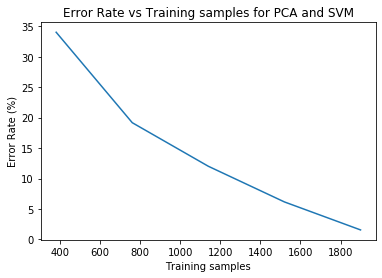

In [85]:
####PCA-SVM
ns = np.array([10,20,30,40,50])
train_samples = 38*ns
error_all = []
for n in tqdm(ns):
    X_train,X_test,y_train,y_test = data_select(features,labels,n)
    X_train = StandardScaler().fit_transform(X_train)
    X_test = StandardScaler().fit_transform(X_test)
    ###PCA
    pca_X_train, pca_X_test = PCA_FR(X_train,X_test)
    ###SVM
    error = svm_FR(pca_X_train,y_train,pca_X_test,y_test)
    error_all.append(error)
    
plt.plot(train_samples,error_all)
plt.title('Error Rate vs Training samples for PCA and SVM')
plt.xlabel('Training samples')
plt.ylabel('Error Rate (%)')
plt.show()

In [ ]:
###LDA-SVM
ns = np.array([10,20,30,40,50])
train_samples = 38*ns
error_all = []
for n in tqdm(ns):
    X_train,X_test,y_train,y_test = data_select(features,labels,n)
    X_train = StandardScaler().fit_transform(X_train)
    X_test = StandardScaler().fit_transform(X_test)
    print(len(X_train[0]))
    ###LDA
    lda_X_train, lda_X_test = LDA_FR(X_train,X_test)
    ##SVM
    error = svm_FR(lda_X_train,y_train,lda_X_test,y_test)
    error_all.append(error)
    
plt.plot(train_samples,error_all)
plt.title('Error Rate vs Training samples for LDA-SVM')
plt.xlabel('Training samples')
plt.ylabel('Error Rate (%)')


In [ ]:
####Comparison of different features with SVM
####LBP-SVM
X_train,X_test,y_train,y_test = lbp_extract(features,labels,40)
error_lbp = svm_FR(X_train,y_train,X_test,y_test)
print(error_lbp)

#####HOG-SVM
X_train,X_test,y_train,y_test = hog_extract(features,labels,40)
error_hog = svm_FR(X_train,y_train,X_test,y_test)
print(error_hog)

X_train,X_test,y_train,y_test = data_select(features,labels,40)
####Eigen-faces SVM
pca_X_train, pca_X_test = PCA_FR(X_train,X_test)
##SVM
error_eigen = svm_FR(pca_X_train,y_train,pca_X_test,y_test)
print(error_eigen)

####Fisherfaces-SVM
lda_X_train, lda_X_test = LDA_FR(X_train,X_test)
##SVM
error_fisher = svm_FR(lda_X_train,y_train,lda_X_test,y_test)
print(error_fisher)

In [ ]:
####PCA-SRC
ns = np.array([10,20,30,40,50])
train_samples = 38*ns
error_all = []
for n in tqdm(ns):
    X_train,X_test,y_train,y_test = data_select(features,labels,n)
    X_train = StandardScaler().fit_transform(X_train)
    X_test = StandardScaler().fit_transform(X_test)
    ###PCA
    pca_X_train, pca_X_test = PCA_FR(X_train,X_test)
    ###SRC
    error = SRC_FR(pca_X_train,y_train,pca_X_test,y_test)
    error_all.append(error)
    
plt.plot(train_samples,error_all)
plt.title('Error Rate vs Training samples for PCA and SRC')
plt.xlabel('Training samples')
plt.ylabel('Error Rate (%)')
plt.show()

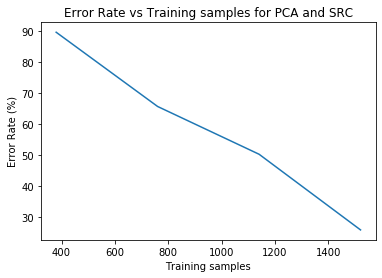

In [87]:
error_all = [89.64,65.7,50.3,25.90]
plt.plot(train_samples[:4],error_all)
plt.title('Error Rate vs Training samples for PCA and SRC')
plt.xlabel('Training samples')
plt.ylabel('Error Rate (%)')
plt.show()

In [ ]:
###LDA-SRC
ns = np.array([10,20,30,40,50])
train_samples = 38*ns
error_all = []
for n in tqdm(ns):
    X_train,X_test,y_train,y_test = data_select(features,labels,n)
    X_train = StandardScaler().fit_transform(X_train)
    X_test = StandardScaler().fit_transform(X_test)
    print(len(X_train[0]))
    ###LDA
    lda_X_train, lda_X_test = LDA_FR(X_train,X_test)
    ##SRC
    error = SRC_FR(lda_X_train,y_train,lda_X_test,y_test)
    error_all.append(error)
    
plt.plot(train_samples,error_all)
plt.title('Error Rate vs Training samples for LDA-SRC')
plt.xlabel('Training samples')
plt.ylabel('Error Rate (%)')
plt.show()

In [ ]:
####Comparison of different features with SRC
####LBP-SRC
X_train,X_test,y_train,y_test = lbp_extract(features,labels,40)
error_lbp = SRC_FR(X_train,y_train,X_test,y_test)
print(error_lbp)

#####HOG-SRC
X_train,X_test,y_train,y_test = hog_extract(features,labels,40)
error_hog = SRC_FR(X_train,y_train,X_test,y_test)
print(error_hog)

X_train,X_test,y_train,y_test = data_select(features,labels,40)
####Eigen-faces SRC
pca_X_train, pca_X_test = PCA_FR(X_train,X_test)
##SRC
error_eigen = SRC_FR(pca_X_train,y_train,pca_X_test,y_test)
print(error_eigen)

####Fisherfaces-SRC
lda_X_train, lda_X_test = LDA_FR(X_train,X_test)
##SRC
error_fisher = SRC_FR(lda_X_train,y_train,lda_X_test,y_test)
print(error_fisher)